$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}$$

# Introduction to Classification

## Classification with Linear Least Squares

To classify a sample as being a member of 1 of 3 different classes, we could use integers 1, 2, and 3 as target outputs.

<img source="http://www.cs.colostate.edu/~anderson/cs545/notebooks/integerclass.png">


Linear function of $x$ seems to match data fairly well. Why is this not a good idea?

We must convert the continuous y-axis value to discrete integers 1, 2, or 3.  Without adding more parameters, we are
forced to use the general solution of splitting at 1.5 and 2.5.

![image](http://www.cs.colostate.edu/~anderson/cs440/notebooks/integerclassboundaries.png)

Rats!  Boundaries are not where we want them.

## Indicator Variables

To allow flexibility, we need to decouple the modeling of the
boundaries.  Problem is due to using one value to represent all classes.
Instead, let's use three values, one for each class.
Binary-valued variables are adequate.  Class 1 = $(1,0,0)$, Class
2 = $(0,1,0)$ and Class 3 = $(0,0,1)$.  These are called **indicator
variables**. 

Our linear model has three
outputs now.  How do we interpret the output for a new sample?

Let the output be $\yv = (y_1, y_2, y_3)$.  Convert these
values to a class by picking the maximum value.

$$
\begin{align*}
\text{class} = \argmax{i}\;\; y_i
\end{align*}
$$

We can plot the three output components on three separate
graphs. What linear functions will each one learn?

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/indicatorvars.png" width=1000>

Overlay them to see which one is the maximum for each $x$ value.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/indicatorvarsmax.png" width=300>

See any potential problems?

What if the green line is too low?

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/indicatorvarsmax2.png" width=300>

What could cause this?


## Masking Problem

Too few samples from Class 2.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/indicatorvars3.png" width=1000>

There may be no values of $x$ for which the second output, $y_2$, of our
linear model is larger than the other two.  Class 2 has become
**masked** by the other classes.

What other shape of function response would work better for this
data?  Hold that thought, while we try an example.

## Example

Let's use the [parkinsons data set](https://archive.ics.uci.edu/ml/datasets/Parkinsons) from UCI ML Archive.

   * 147 samples from subjects with Parkinsons, 48 samples from healthy subjects
   * Each sample composed of 22 numerical features extracted from voice recordings
   * Feature named *status* is 0 for healthy subjects, 1 for subjects with Parkinson's Disease
   * from collaboration with the University of Oxford and the National Center for Voice and Speech in Denver.

Let's download the data file and read it in.  Also print the shapes of
X and T and summarize the X and T data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = open("parkinsons.data","r")
header = f.readline()
names = header.strip().split(',')[1:]

data = np.loadtxt(f ,delimiter=',', usecols=1 + np.arange(23))
data.shape

(195, 23)

In [3]:
names

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [4]:
x=np.arange(10).reshape((2, 5))
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [5]:
np.delete?

In [5]:
np.delete(x, 2, 1)

array([[0, 1, 3, 4],
       [5, 6, 8, 9]])

In [6]:
targetColumn = names.index("status")
XColumns = np.arange(23)
XColumns = np.delete(XColumns, targetColumn)
X = data[:, XColumns]
T = data[:, targetColumn].reshape((-1, 1)) # to keep 2-d matrix form
names.remove("status")
X.shape, T.shape

((195, 22), (195, 1))

In [7]:
print('{:20s} {:9s} {:9s}'.format(' ','mean','stdev'))
for i in range(X.shape[1]):
    print('{:20s} {:9.3g} {:9.3g}'.format(names[i], np.mean(X[:,i]), np.std(X[:,i])))


                     mean      stdev    
MDVP:Fo(Hz)                154      41.3
MDVP:Fhi(Hz)               197      91.3
MDVP:Flo(Hz)               116      43.4
MDVP:Jitter(%)         0.00622   0.00484
MDVP:Jitter(Abs)       4.4e-05  3.47e-05
MDVP:RAP               0.00331   0.00296
MDVP:PPQ               0.00345   0.00275
Jitter:DDP             0.00992   0.00888
MDVP:Shimmer            0.0297    0.0188
MDVP:Shimmer(dB)         0.282     0.194
Shimmer:APQ3            0.0157    0.0101
Shimmer:APQ5            0.0179     0.012
MDVP:APQ                0.0241    0.0169
Shimmer:DDA              0.047    0.0304
NHR                     0.0248    0.0403
HNR                       21.9      4.41
RPDE                     0.499     0.104
DFA                      0.718    0.0552
spread1                  -5.68      1.09
spread2                  0.227    0.0832
D2                        2.38     0.382
PPE                      0.207    0.0899


In [8]:
uniq = np.unique(T)
print('   Value  Occurrences')
for i in uniq:
    print('{:7.1g} {:10d}'.format(i, np.sum(T==i)))

   Value  Occurrences
      0         48
      1        147


Two indicator variables is equivalent to using single variable, so we
will stick with *status* as our output variable, with value of 0
meaning healthy and 1 meaning Parkinsons.

For small sample size or very uneven number of samples from
each class, force equal sampling proportions of two classes
when building train, test partitions.  Let's use 80% for training and
20% for testing.

In [9]:
trainf = 0.8
healthyI,_ = np.where(T == 0)
parkI,_ = np.where(T == 1)
healthyI = np.random.permutation(healthyI)
parkI = np.random.permutation(parkI)

nHealthy = round(trainf * len(healthyI))
nPark = round(trainf * len(parkI))
rowsTrain = np.hstack((healthyI[:nHealthy], parkI[:nPark]))
Xtrain = X[rowsTrain,:]
Ttrain = T[rowsTrain,:]
rowsTest = np.hstack((healthyI[nHealthy:], parkI[nPark:]))
Xtest =  X[rowsTest,:]
Ttest =  T[rowsTest,:]

print
print('Xtrain is {:d} by {:d}. Ttrain is {:d} by {:d}'.format(*(Xtrain.shape + Ttrain.shape)))
uniq = np.unique(Ttrain)
print('   Value  Occurrences')
for i in uniq:
    print('{:7.1g} {:10d}'.format(i, np.sum(Ttrain==i)))

    
print('Xtest is {:d} by {:d}. Ttest is {:d} by {:d}'.format(*(Xtest.shape + Ttest.shape)))
uniq = np.unique(Ttest)
print('   Value  Occurrences')
for i in uniq:
    print('{:7.1g} {:10d}'.format(i, np.sum(Ttest==i)))


Xtrain is 156 by 22. Ttrain is 156 by 1
   Value  Occurrences
      0         38
      1        118
Xtest is 39 by 22. Ttest is 39 by 1
   Value  Occurrences
      0         10
      1         29


That's about the same ratio of 0's and 1's.

In [10]:
38/118, 10/29

(0.3220338983050847, 0.3448275862068966)

and in the original data set we had

In [11]:
48/147

0.32653061224489793

## Least Squares Solution

First let's standardize the inputs.  Don't standardize the outputs.
They indicate the class.  Then just calculate the linear least squares
solution. This time we will use `np.linalg.lstsq` to solve the set of linear equations for the weights, rather than using gradient descent to iterative find the weights.

In [12]:
def train(X, T, lamb=0):
    means = X.mean(0)
    stds = X.std(0)
    n,d = X.shape
    Xs = (X - means) / stds
    Xs1 = np.insert(Xs , 0, 1, axis=1)
    lambDiag = np.eye(d+1) * lamb
    lambDiag[0, 0] = 0
    w = np.linalg.lstsq( Xs1.T @ Xs1 + lambDiag, Xs1.T @ T)[0]
    return {'w': w, 'means':means, 'stds':stds}

def use(model, X):
    Xs = (X - model['means']) / model['stds']
    Xs1 = np.insert(Xs , 0, 1, axis=1)
    return Xs1 @ model['w']

In [13]:
model = train(Xtrain, Ttrain)

names.insert(0,'bias')
for i in range(len(names)):
    print('{:2d} {:>20s} {:10.3g}'.format(i, names[i], model['w'][i][0]))


 0                 bias      0.756
 1          MDVP:Fo(Hz)      -0.11
 2         MDVP:Fhi(Hz)   -0.00864
 3         MDVP:Flo(Hz)    -0.0297
 4       MDVP:Jitter(%)      -0.45
 5     MDVP:Jitter(Abs)     -0.117
 6             MDVP:RAP      -3.87
 7             MDVP:PPQ     -0.162
 8           Jitter:DDP       4.54
 9         MDVP:Shimmer      0.472
10     MDVP:Shimmer(dB)     0.0185
11         Shimmer:APQ3      -1.84
12         Shimmer:APQ5     -0.361
13             MDVP:APQ     0.0145
14          Shimmer:DDA       1.77
15                  NHR     -0.152
16                  HNR    -0.0539
17                 RPDE    -0.0496
18                  DFA      0.036
19              spread1     0.0755
20              spread2      0.103
21                   D2     0.0318
22                  PPE      0.118


Which ones appear to be most important?

And, of course, let's test our linear model. To compare to the target values of 0 and 1, we must convert the continuous output value to 0 or 1, whichever is closest.

In [14]:
def convertTo01(Y):
    distFromTarget = np.abs(Y - [0,1])
    whichTargetClosest = np.argmin(distFromTarget, axis=1).reshape((-1, 1))
    return whichTargetClosest  # column index equivalent to 0 and 1 targets

In [15]:
convertTo01(np.array([0.1, 1.1, -0.5, 0.56]).reshape((-1,1)))

array([[0],
       [1],
       [0],
       [1]])

In [16]:
Ytrain = use(model, Xtrain)

predictedTrain = convertTo01(Ytrain)

percentCorrectTrain = np.sum(predictedTrain == Ttrain) / Ttrain.shape[0] * 100.0

Ytest = use(model, Xtest)

predictedTest = convertTo01(Ytest)
percentCorrectTest = np.sum(predictedTest == Ttest) / float(Ttest.shape[0]) * 100.0

print('Percent Correct: Training {:6.1f} Testing {:6.1f}'.format(percentCorrectTrain, percentCorrectTest))

Percent Correct: Training   88.5 Testing   84.6


What visualization would you use to check the results?

Let's plot the true class with the output of the model for
each training sample, then each testing 

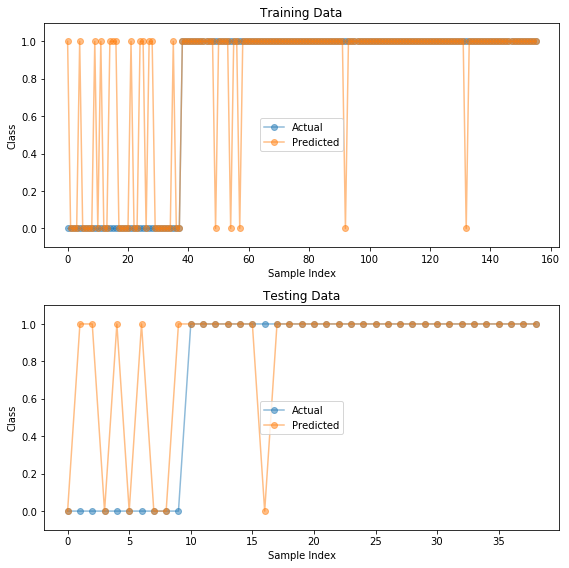

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1 ,1)
plt.plot(np.hstack((Ttrain, predictedTrain)), 'o-', alpha=0.5)
plt.ylim(-0.1, 1.1) # so markers will show
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Training Data')
plt.legend(('Actual', 'Predicted'), loc='center')

plt.subplot(2, 1, 2)
plt.plot(np.hstack((Ttest, predictedTest)), 'o-', alpha=0.5)
plt.ylim(-0.1, 1.1)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Testing Data')
plt.legend(('Actual', 'Predicted'), loc='center');

plt.tight_layout()

Might also be revealing to add the continuously-valued output of the
network, before being converted to the class.

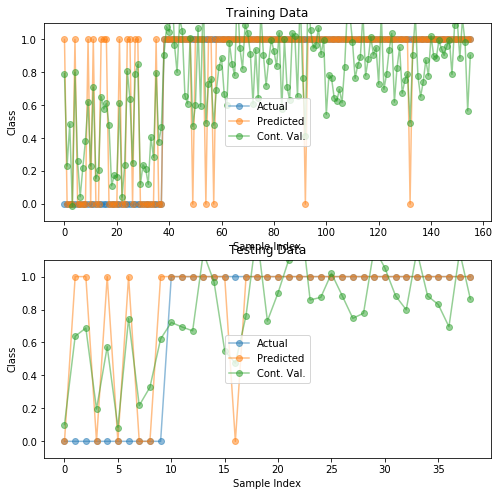

In [18]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(np.hstack((Ttrain, predictedTrain, Ytrain)),'o-', alpha=0.5)
plt.ylim(-0.1, 1.1) # so markers will show
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Training Data')
plt.legend(('Actual', 'Predicted', 'Cont. Val.'), loc='center')

plt.subplot(2, 1, 2)
plt.plot(np.hstack((Ttest, predictedTest, Ytest)), 'o-', alpha=0.5)
plt.ylim(-0.1, 1.1)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Testing Data')
plt.legend(('Actual', 'Predicted', 'Cont. Val.'), loc='center');


## Shape of Boundary

Imagine  we have just two variable attributes, $x_1$ and $x_2$.  With our
linear least squared model $\wv$, we make a prediction for
sample $\xv=(x_1,x_2)$ by

$$
y(\xv) = w_0 + w_1 x_1 + w_2 x_2
$$

For the parkinsons problem, we will predict the class for this sample
is 'healthy' if

$$
y(\xv) = w_0 + w_1 x_1 + w_2 x_2 < 0.5
$$

So the boundary between the 'healthy' and the 'parkinsons' class in
the two-dimensional $x_1, x_2$ space

$$
w_0 + w_1 x_1 + w_2 x_2 = 0.5
$$

is of what shape?

Above methods are discriminative in nature, meaning that what is
learned is a function that is designed to produce different values for
different classes.  

An alternative approach
is to first create a probabilistic model of samples from each class,
forming a model with which samples from a class can be generated,
hence a **generative model**. The number of models is the same as the
number of classes.

Before jumping into the details of simple generative models, we will
first review probability theory, joint probabilities, conditional
probabilities, Bayes theorem, and the Gaussian distribution.

# Probability Theory

## Boxes of Fruit

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/fruitjars.png">

Counts of fruit in each jar:

| | apples  |  oranges  |  strawberries  |
| ---: | :---: | :---: | :---: | ---: |
|  red jar |  2  |  6  |  4  | $\Sigma$ = 12  |
|  blue jar |  3  |  1  |  2  | $\Sigma$ = 6  |

Probabilities of fruit from a given jar:

|  |  apples  |  oranges  |  strawberries  |
| ---: | :---: | :---: | :---: | ---: |
|  red jar |  2/12 = 0.167  |  6/12 = 0.5  |  4/12 = 0.33  | $\Sigma$ = 1.0  |
|  blue jar |  3/6 = 0.5  |  1/6 = 0.167  |  2/6 = 0.33  | $\Sigma$ = 1.0  |

Say the probability of choosing the red jar is 0.6 and for choosing
the blue jar is 0.4. 
The probability of choosing the red jar and drawing an apple out
of the red jar is the product of these two choices, or $0.6 (0.167) = 0.1$.

Doing all multiplications results in

|  |  apples  |  oranges  |  strawberries  |
| ---: | :---: | :---: | :---: | ---: |
|  red jar (P=0.6) |  0.6(0.167) = 0.1  |  0.6(0.5) = 0.3  |  0.6(0.33) = 0.2  | $\Sigma$ = 0.5982  |
|  blue jar (P=0.4) |  0.4(0.5) = 0.2  |  0.4(0.167) = 0.067  |  0.4(0.33) = 0.133  | $\Sigma$ = 0.3988  |

## Joint Probability Table 

Combine in a two-dimensional table to show joint
probabilities of two events.

|       |   |   | fruit  | | 
| :---: | :---: | :---: | :---: | :---: | ---: |
|       |   |  apple  |  orange  |  strawberry  |
|  jar  |  red  |  0.1  |  0.3  |  0.2  | $\Sigma$ = 0.5982  |
|    |  blue  |  0.2  |  0.067  |  0.133  | $\Sigma$ = 0.3988  |
|       |     | $\Sigma$=0.3  |  $\Sigma$ = 0.367  | $\Sigma$ = 0.333 | $\Sigma$=1  |

Symbolically, let $J$ be a random variable for jar, and $F$  be a random variable for fruit:

|       |   |  | fruit  | |
| :---: | :---: | :---: | :---: | :---: | ---: |
|       |   |  apple  |  orange  |  strawberry  |
|  jar  |  red  |  P(J=red,F=apple)  |  P(J=red,F=orange)  |  P(J=red,F=strawberry)  |  P(J=red)  |
|    |  blue  |  P(J=blue,F=apple)  |  P(J=blue,F=orange)  |  P(J=blue,F=strawberry)  |  P(J=blue)  |
|       |     |  P(F=apple)  |  P(F=orange)  |  P(F=strawberry)  | 1  |


## Bayes Rule

Just saw  an example of the **product rule**:

$$
\begin{align*}
 P(F=orange, J=blue) = P(F=orange | J=blue) P(J=blue)
\end{align*}
$$

Since

$$
\begin{align*}
P(F=orange, J=blue) = P(J=blue, F=orange)
\end{align*}
$$

and

$$
\begin{align*}
P(J=blue,F=orange) = P(J=blue|F=orange)P(F=orange)
\end{align*}
$$

we know

$$
\begin{align*}
P(J=blue|F=orange)& P(F=orange) =\\
& P(F=orange | J=blue) P(J=blue)
\end{align*}
$$

Dividing both sides by $P(F=orange)$ leads to **Bayes Rule**:

$$
\begin{align*}
P(J=blue | F=orange) = \frac{P(F=orange|J=blue)P(J=blue)}{P(F=orange)}
\end{align*}
$$

On the right hand side of Bayes Rule, all terms are given except
$P(F=orange)$

$$
\begin{align*}
P(J=blue | F=orange) = \frac{P(F=orange|J=blue)P(J=blue)}{P(F=orange)}
\end{align*}
$$

We can use the **sum rule** to get this

$$
\begin{align*}
P(F=orange) & = \sum_{j\in\{red,blue\}} P(F=orange,J=j) \\
& = 0.3+0.067\\
& = 0.367
\end{align*}
$$

So, Bayes Rule can be rewritten as

$$
\begin{align*}
P(J=blue|F=orange) = 
\frac{P(F=orange|J=blue)P(J=blue)}{\sum_j P(F=orange,J=j)}
\end{align*}
$$

or

$$
\begin{align*}
P(J=blue|F=orange) = 
\frac{P(F=orange|J=blue)P(J=blue)}{\sum_j P(F=orange|J=j)P(J=j)}
\end{align*}
$$

Now in Python. We can represent a conditional probability table as a two-dimensional array.

In [20]:
counts = np.array([[2, 6, 4], [3, 1, 2]])
counts

array([[2, 6, 4],
       [3, 1, 2]])

Let's include the row and column names as lists, and write a function to print the table.

In [21]:
jarNames = ['red', 'blue']
fruitNames = ['apple', 'orange', 'strawberry']

In [22]:
def printTable(label, data):
    print
    print(label)
    print('   {:>9s} {:>7s} {:>9s}'.format(*fruitNames))
    for i in [0, 1]:
        d = data[i, :].tolist()
        print('{:4s} {:7.3g} {:7.3g} {:7.3g} {:7.3g}'.format(*([jarNames[i]] + d + [sum(d)])))
    colTotals = np.sum(data, axis=0).tolist()
    print('     {:7.3g} {:7.3g} {:7.3g} {:7.3g}'.format(*(colTotals + [sum(colTotals)])))

printTable('counts', counts)

counts
       apple  orange strawberry
red        2       6       4      12
blue       3       1       2       6
           5       7       6      18


Calculate the sums of fruits in each jar by

In [23]:
jarSums = np.sum(counts, axis=1).reshape((2, 1))
jarSums

array([[12],
       [ 6]])

Now we can calculate the probability of drawing each type of fruit, given that we have already chosen a jar.

In [24]:
pFruitGivenJar = counts / jarSums
printTable('Prob(Fruit|Jar)', pFruitGivenJar)

Prob(Fruit|Jar)
       apple  orange strawberry
red    0.167     0.5   0.333       1
blue     0.5   0.167   0.333       1
       0.667   0.667   0.667       2


We can do more if we code the probability of selecting a jar.

In [25]:
pJar = np.array([[0.6], [0.4]])
pJar

array([[ 0.6],
       [ 0.4]])

Now we can calculate the joint probabilities, or the probabilities of each pair of a jar and a fruit occurring.

In [26]:
pFruitAndJar = pFruitGivenJar * pJar
printTable('Prob(Fruit,Jar)', pFruitAndJar)

Prob(Fruit,Jar)
       apple  orange strawberry
red      0.1     0.3     0.2     0.6
blue     0.2  0.0667   0.133     0.4
         0.3   0.367   0.333       1


The sum at the lower right had better be 1, because this table is all possible results. 

How do we get the probability of a fruit from this table?  Just sum over the jars to marginalize out (remove) the jars.

In [27]:
pFruit = np.sum(pFruitAndJar, axis=0)
pFruit

array([ 0.3       ,  0.36666667,  0.33333333])

Now the probability of a jar given that you know which fruit was drawn, is

In [28]:
pJarGivenFruit = pFruitAndJar / pFruit
printTable('Prob(Jar|Fruit)', pJarGivenFruit)

Prob(Jar|Fruit)
       apple  orange strawberry
red    0.333   0.818     0.6    1.75
blue   0.667   0.182     0.4    1.25
           1       1       1       3


# Bayes Rule for Classification

Replace jars with groups of hand-drawn digits. 
Replace fruits with  hand-drawn images.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/jarsofdigits.png">



Let $i$ be a particular image. To classify an image $i$ as a
particular digit, such as 4, we want to know

$$
\begin{align*}
P(Digit = 4 \;|\; Image = i)
\end{align*}
$$

but we probably only know

$$
\begin{align*}
   P(Image = i \;|\; Digit = 4)
\end{align*}
$$

If we assume

$$
\begin{align*}
P(Image=i) = &\frac{1}{\mbox{number of images}}\\
P(Digit=4)=&\frac{1}{10}
\end{align*}
$$

then we can use Bayes rule:

$$
\begin{align*}
    P(Digit=4\;|\;Image=i) & = \frac{P(Image=i\;|\;Digit=4)  P(Digit=4)}{P(Image=i)}\\
&\\
& = \frac{P(Image=i\;|\;Digit=4) 0.1}{(1/\mbox{number of images)}}
\end{align*}
$$

# Classification: Simple Generative Models

Above we discussed a linear function as a discriminant
function.  If we had three classes, we would have three
discriminant functions, and their values would be compared to find the
maximum value to make the class prediction.

A different way to develop a similar comparison is to start with
models of the data from each class.  If the models define a
probability distribution over possible values, the models are
**generative models**.  

What shape model would you like? 

A Gaussian, or Normal distribution, is a nice choice.  Its integral sums to one, its value is always nonnegative, and the derivative of its natural logarithm is very nice.


$$
p(\xv) = \frac{1}{2\pi^{d/2} |\Sigmav |^{1/2}}
      e^{-\frac{1}{2} (\xv-\muv)^T \Sigmav^{-1} (\xv - \muv)}
$$

where mean $\muv$ is a $d$-dimensional column vector and covariance
matrix $\Sigmav$ is a $d\times d$ symmetric matrix.


Back to that Masking Problem.. What function shape were you thinking of that might fix the masking problem?

Radial basis function?  Good choice!  But, remember what a
radial basis function resembles?

Right again!  A Normal distribution.

So, let's say we come up with the generative distribution,
such as a Normal distribution, for
Class $k$, called $p(\xv|Class=k)$, or $p(\xv|C=k)$. How do we use
it to classify?

Can just take the distribution with the highest value,
$\argmax{k}\; p(\xv|C=k)$.  But we can do better than this...think
Bayes' Rule.

Ultimately we would like to know $p(C=k|\xv)$.  How do we
get this from $p(\xv|C=k)$?

Remember that

$$
    \begin{align*}
      p(C=k,\xv) = p(C=k|\xv)p(\xv) = p(\xv|C=k)p(C=k)
   \end{align*}
$$

so 

$$
   \begin{align*}
      p(C=k|\xv) &= \frac{p(\xv|C=k)p(C=k)}{p(\xv)}\\ \\
 &= \frac{p(\xv|C=k)p(C=k)}{\sum_{k=1}^K p(\xv,C=k)}\\ \\
&= \frac{p(\xv|C=k)p(C=k)}{\sum_{k=1}^K p(\xv|C=k)p(C=k)}
      \end{align*}
$$

For two classes, $k\in \{1,2\}$.  We will classify a sample
$\xv$ as Class 2 if $p(C=2|\xv) > p(C=1|\xv)$.  Now expand and simplify...

$$
    \begin{align*}
      p(C=2|\xv) &> p(C=1|\xv)\\ \\
      \frac{p(\xv|C=2)p(C=2)}{p(\xv)}  &>
      \frac{p(\xv|C=1)p(C=1)}{p(\xv)} \\ \\
      p(\xv|C=2)p(C=2)  &>   p(\xv|C=1)p(C=1) 
    \end{align*}
$$

Using our assumption that the generative distribution for each
class is a Normal distribution,

$$
    \begin{align*}
      p(\xv|C=2) p(C=2)  &>   p(\xv|C=1)p(C=1) \\  \\
      \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma_2|^{\frac{1}{2}}}
       e^{-\frac{1}{2}(\xv-\muv_2)^T \Sigma_2^{-1} (\xv-\muv_2)} p(C=2)      
& > \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma_1|^{\frac{1}{2}}}
      e^{-\frac{1}{2}(\xv-\muv_1)^T \Sigma_1^{-1} (\xv-\muv_1)} p(C=1)
      \\ \\
      |\Sigma_2|^{-\frac{1}{2}}
       e^{-\frac{1}{2}(\xv-\muv_2)^T \Sigma_2^{-1} (\xv-\muv_2)} p(C=2) 
      & > |\Sigma_1|^{-\frac{1}{2}}
      e^{-\frac{1}{2}(\xv-\muv_1)^T \Sigma_1^{-1} (\xv-\muv_1)} p(C=1) \\
    \end{align*}
$$

Hey, there are multiplications and exponentials here.  Let's
use logarithms!

$$
    \begin{align*}
      |\Sigma_2|^{-\frac{1}{2}}
       e^{-\frac{1}{2}(\xv-\muv_2)^T \Sigma_2^{-1} (\xv-\muv_2)} p(C=2) 
& > |\Sigma_1|^{-\frac{1}{2}}
      e^{-\frac{1}{2}(\xv-\muv_1)^T \Sigma_1^{-1} (\xv-\muv_1)} p(C=1)
      \\ \\
      -\frac{1}{2}  \ln |\Sigma_2| +
       -\frac{1}{2}(\xv-\muv_2)^T \Sigma_2^{-1} (\xv-\muv_2) + \ln p(C=2) 
      & > -\frac{1}{2} \ln |\Sigma_1| +
      -\frac{1}{2}(\xv-\muv_1)^T \Sigma_1^{-1} (\xv-\muv_1) + \ln p(C=1) 
    \end{align*}
$$

If we define each side of this last inequality as a discriminant function, $\delta_k(\xv)$ for
Class $k$, then

$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
\Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

and the class of a new sample $\xv$ is $\argmax{k}\; \delta_k(\xv)$.

The boundary between Class 1 and Class 2 is the set of points $\xv$
for which $\delta_2(\xv) = \delta_1(\xv)$. This equation
is quadratic in $\xv$, meaning that the boundary between Class 1 and 2
is quadratic.  We have just defined **Quadratic Discriminant Analysis,
or QDA**.  


## QDA: Quadratic Discriminant Analysis

Now, some Python fun with QDA.  First, let's make some data.  Let it be $D$ dimensional so we can vary
the dimensionality of the data.

In [19]:
D = 1  # number of components in each sample
N = 10  # number of samples in each class
X1 = np.random.normal(0.0, 1.0, (N, D))
T1 = np.array([1]*N).reshape((N, 1))
X2 = np.random.normal(4.0, 1.5, (N, D))  # wider variance
T2 = np.array([2]*N).reshape((N, 1))

data = np.hstack(( np.vstack((X1, X2)), np.vstack((T1, T2))))
data.shape

(20, 2)

Now imagine we only have *data* and don't know how it was
generated.  We don't know the mean and covariance of the two classes.
Data looks like

In [20]:
data

array([[ -2.91318412e-01,   1.00000000e+00],
       [  7.73311732e-01,   1.00000000e+00],
       [  1.32093200e+00,   1.00000000e+00],
       [  3.56644397e-01,   1.00000000e+00],
       [  3.56254573e-03,   1.00000000e+00],
       [  5.99877510e-01,   1.00000000e+00],
       [  8.29885876e-01,   1.00000000e+00],
       [  8.75385624e-01,   1.00000000e+00],
       [  1.76413466e+00,   1.00000000e+00],
       [ -1.99175681e-01,   1.00000000e+00],
       [  4.29479392e+00,   2.00000000e+00],
       [  4.65967145e+00,   2.00000000e+00],
       [  2.64698427e+00,   2.00000000e+00],
       [  3.60671629e+00,   2.00000000e+00],
       [  3.68311013e+00,   2.00000000e+00],
       [  7.10132636e+00,   2.00000000e+00],
       [  2.96192374e+00,   2.00000000e+00],
       [  4.49864011e+00,   2.00000000e+00],
       [  3.32256111e+00,   2.00000000e+00],
       [  2.10079688e+00,   2.00000000e+00]])

Start as before.  Separate into input columns and target column.  The
target is now an integer representing the class.  And let's
standardize the inputs.

In [21]:
X = data[:, 0:D]
T = data[:, -1:]
means = np.mean(X, 0)
stds = np.std(X, 0)
Xs = (X - means) / stds

In [22]:
Xs.mean(0), Xs.std(0)

(array([  1.31145095e-16]), array([ 1.]))

Now we need a QDA discriminant function.  Here is the math again.

$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
\Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

Let's consider ways to calculate that $\Sigma_k^{-1}$.

In [23]:
Sigma = np.array([[1, 2], [2, 1]])
Sigma @ np.linalg.inv(Sigma)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [24]:
Sigma @ np.linalg.pinv(Sigma)

array([[  1.00000000e+00,  -2.22044605e-16],
       [  1.11022302e-16,   1.00000000e+00]])

In [25]:
Sigma = np.array([[1, 2], [1, 2]])
Sigma

array([[1, 2],
       [1, 2]])

In [26]:
np.linalg.inv(Sigma)

LinAlgError: Singular matrix

In [ ]:
np.linalg.pinv?

In [27]:
Sigma @ np.linalg.pinv(Sigma)

array([[ 0.5,  0.5],
       [ 0.5,  0.5]])

In [28]:
def discQDA(X, means, stds, mu, Sigma, prior):
    Xc = (X - means) / stds - mu
    if Sigma.size == 1:
        Sigma = np.asarray(Sigma).reshape((1,1))
    det = np.linalg.det(Sigma)        
    # if det == 0:
    #   raise np.linalg.LinAlgError('discQDA(): Singular covariance matrix')
    SigmaInv = np.linalg.pinv(Sigma)     # pinv in case Sigma is singular
    return -0.5 * np.log(det) \
           - 0.5 * np.sum(np.dot(Xc, SigmaInv) * Xc, axis=1).reshape((-1,1)) \
           + np.log(prior)

To use this, we must calculate the mean, covariance, and prior
probabililty for each class.
What about $p(C=k)$, which is the a prior probability
distribution of Class $k$?  If we have no prior belief that one
class is more likely than any other,

$$
\begin{align*}
p(C=k) &= \frac{N_k}{N}
\end{align*}
$$

where $N$ is the total number of samples from all classes.

We are still pretending we do not know how the data was generated.

In [40]:
(T==1).reshape((-1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [31]:
class1rows = (T==1).reshape((-1))
class2rows = (T==2).reshape((-1))

mu1 = np.mean(Xs[class1rows, :], axis=0)
mu2 = np.mean(Xs[class2rows, :], axis=0)

Sigma1 = np.cov(Xs[class1rows, :].T)
Sigma2 = np.cov(Xs[class2rows, :].T)

N1 = np.sum(class1rows)
N2 = np.sum(class2rows)
N = len(T)
prior1 = N1 / float(N)
prior2 = N2 / float(N)

In [32]:
Sigma1

array(0.114542064231151)

Now let's apply our discriminant function to some new data.

In [33]:
nNew = 100
newData = np.linspace(-5.0, 10.0, nNew).repeat(D).reshape((nNew, D))

d1 = discQDA(newData, means, stds, mu1, Sigma1, prior1)
d2 = discQDA(newData, means, stds, mu2, Sigma2, prior2)

In [34]:
d1.shape, d2.shape

((100, 1), (100, 1))

and look at it.  If data is more than one dimensional, let's just plot
with respect to the first component.

To obtain the value of the Normal distribution value for a given data sample, we have two choices:

   1. Start with the discriminant function value and transform it to the full Normal distribution value,
   2. Use our implementation of the Normal distibution directly.

In [35]:
mu1, mu2, Sigma1, Sigma2

(array([-0.84627586]),
 array([ 0.84627586]),
 array(0.114542064231151),
 array(0.5161627618017585))

In [36]:
def normald(X, mu, sigma):
    """ normald:
       X contains samples, one per row, N x D. 
       mu is mean vector, D x 1.
       sigma is covariance matrix, D x D.  """
    D = X.shape[1]
    detSigma = sigma if D == 1 else np.linalg.det(sigma)
    if detSigma == 0:
        raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
    sigmaI = 1.0/sigma if D == 1 else np.linalg.inv(sigma)
    normConstant = 1.0 / np.sqrt((2*np.pi)**D * detSigma)
    diffv = X - mu.T # change column vector mu to be row vector
    return normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,np.newaxis]

In [37]:
mu1, mu2

(array([-0.84627586]), array([ 0.84627586]))

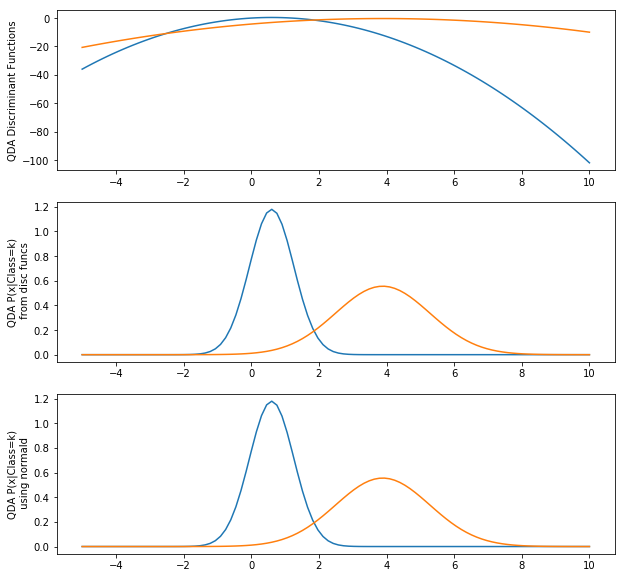

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(newData[:, 0],np.hstack((d1, d2)))
plt.ylabel("QDA Discriminant Functions")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions
plt.subplot(3, 1, 2)

probs = np.exp( np.hstack((d1, d2)) - 0.5  *D * np.log(2 * np.pi)  - np.log(np.array([[prior1, prior2]])))

plt.plot(newData[:,0], probs)
plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

# Plot generative distributions  p(x | Class=k)  using normald    ERROR HERE
plt.subplot(3, 1 ,3)
newDataS = (newData - means) / stds

probs = np.hstack((normald(newDataS, mu1, Sigma1),
                   normald(newDataS, mu2, Sigma2)))
plt.plot(newData, probs)
plt.ylabel("QDA P(x|Class=k)\n using normald", multialignment="center");


Since there are only 10 training samples per class, results will
change a bit from run to run.

But, what if we have more dimensions than samples?  Setting $D=20$,
with $N=10$, results in

/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log
/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp
/home/anderson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


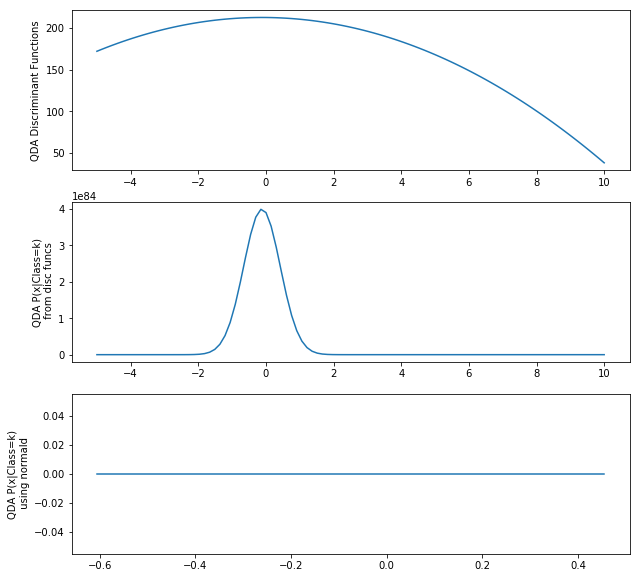

In [39]:
D = 20  # number of components in each sample
N = 10  # number of samples in each class
X1 = np.random.normal(0.0, 1.2, (N, D))
T1 = np.array([1]*N).reshape((N, 1))
X2 = np.random.normal(4.0, 1.8, (N, D))  # wider variance
T2 = np.array([2]*N).reshape((N, 1))

data = np.hstack(( np.vstack((X1, X2)), np.vstack((T1, T2))))
X = data[:, 0:D]
T = data[:, -1]
means, stds = np.mean(X,0), np.std(X,0)
Xs = (X-means)/stds

class1rows = T==1
class2rows = T==2

mu1 = np.mean(Xs[class1rows,:],axis=0)
mu2 = np.mean(Xs[class2rows,:],axis=0)

Sigma1 = np.cov(Xs[class1rows,:].T)
Sigma2 = np.cov(Xs[class2rows,:].T)

N1 = np.sum(class1rows)
N2 = np.sum(class2rows)
N = len(T)
prior1 = N1 / float(N)
prior2 = N2 / float(N)

nNew = 100
newData = np.linspace(-5.0,10.0,nNew).repeat(D).reshape((nNew,D))

d1 = discQDA(newData,means,stds,mu1,Sigma1,prior1)
d2 = discQDA(newData,means,stds,mu2,Sigma2,prior2)

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(newData[:,0],np.hstack((d1,d2)))
plt.ylabel("QDA Discriminant Functions")
# Plot generative distributions  p(x | Class=k)  starting with discriminant functions
plt.subplot(3,1,2)
probs = np.exp( np.hstack((d1,d2)) - 0.5*D*np.log(2*np.pi) - np.log(np.array([[prior1,prior2]])))
plt.plot(newData[:,0],probs)
plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

# Plot generative distributions  p(x | Class=k)  using normald
plt.subplot(3,1,3)
newDataS = (newData-means)/stds
probs = np.hstack((normald(newDataS,mu1,Sigma1),
                   normald(newDataS,mu2,Sigma2)))
plt.plot(newData[:,0],probs)
plt.ylabel("QDA P(x|Class=k)\n using normald", multialignment="center");

What happened?  $\Sigma$ is very close to singular, meaning columns of $\Xv$ are
close to collinear.  The determinant of a singular matrix is zero and its
inverse doesn't exist.  We will discuss ways of handling this in the
future.

For two dimensional data from two classes, our data and decision
boundary, where $\delta_1(\xv) = \delta_2(\xv)$, might look like

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/twonormalsboundary.png">

Assuming a single Normal distribution as the model of data from each class does
not seem to lead to an exceedingly complex model.  But, how many
parameters are there in the mean and covariance matrix, if data is $d$-dimensional?

   - Mean has $d$ components.
   - Covariance matrix has $d^2$ components.  If $d = 100$, the covariance matrix has 100,000 parameters.  Whoa!

Actually the covariance matrix is symmetric, so it only has $\frac{d^2}{2} + \frac{d}{2} =  \frac{d(d+1)}{2}$ unique values.  Still a lot.  And we have one for each class, so total number of parameters, including mean, is $K(d + \frac{d(d+1)}{2})$. 

What if the data distribution is under-sampled?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/twonormalsboundary2.png">

Normal distribution Gaussian for Class 1 is far from correct.  Class boundary will
now lead to many errors.

How can we reduce the chance of overfitting?
Need to remove flexibility from the Normal distribution model.  How?

Could restrict all covariance matrices to be diagonal.  The
ellipses would be parallel to the axes.  Wouldn't work well if
features are correlated.

Could force all classes to have the same covariance matrix by
averaging the covariance matrices from every class.

Seems like a  bad idea, but at least we are using all of the
data samples to come up with a covariance matrix.

If we use the average of the
covariance matrix for each class, weighted by the fraction of
samples from that class, we would see

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/twonormalsboundary2lda.png">

Better result than using unique covariance matrices.

Notice the boundary.  It is now linear, not the quadratic curve
we had before.  Why?

Remember our discriminant function. 

$$
      \begin{align*}
        \delta_k(\xv) = -\frac{1}{2} \ln |\Sigma_k| -\frac{1}{2}(\xv-\muv_k)^T
        \Sigma_k^{-1} (\xv-\muv_k) + \ln P(C=k)
      \end{align*}
$$

When we compare discriminant functions, $\delta_2(\xv) > \delta_1(\xv)$, and use the same
covariance matrix $\Sigmav$ for every class, we get

$$
      \begin{align*}
        -\frac{1}{2} & \ln |\Sigma| +
        -\frac{1}{2}(\xv-\muv_2)^T \Sigma^{-1} (\xv-\muv_2) + \ln p(C=2) 
        \\ & > -\frac{1}{2} \ln |\Sigma| +
        -\frac{1}{2}(\xv-\muv_1)^T \Sigma^{-1} (\xv-\muv_1) + \ln p(C=1) 
      \end{align*}
$$

which can be simplified to

$$
      \begin{align*}
        -\frac{1}{2}(\xv-\muv_2)^T \Sigma^{-1} (\xv-\muv_2) + \ln p(C=2) 
        & > -\frac{1}{2}(\xv-\muv_1)^T \Sigma^{-1} (\xv-\muv_1) + \ln p(C=1) \\
        \xv^T \Sigmav^{-1} \muv_1 - \frac{1}{2}\muv_1^T \Sigmav^{-1} \muv_1 + \log
        P(C=1) 
        &> \xv^T \Sigmav^{-1} \muv_2 - \frac{1}{2}\muv_2^T \Sigmav^{-1} \muv_2
        + \log P(C=2)
      \end{align*}
$$


So, our discriminant function has become

$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$

This is linear in $\xv$, hence and can be written as

$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \wv_k + \text{constant}_k
      \end{align*}
$$


So, using Normal distributions as generative models and
restricting the covariance matrices to all be the weighted average
of class covariance matrices

$$
\begin{align*}
\Sigmav = \sum_{k=1}^K \frac{N_k}{N} \Sigmav_k
\end{align*}
$$

results in a linear boundary.  This
approach is called Linear Discriminant Analysis (LDA).

Both QDA and LDA are based on Normal distributions for
modeling the data samples in each class.

QDA is more flexible, but LDA often works better in
practice.  When?

   - Undersampled data
     - Small number of samples
     - High dimensional data


## Example

Let's play with the parkinsons data and classify it using QDA.

Calculate means and covariance matrices

In [70]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((156, 22), (156, 1), (39, 22), (39, 1))

In [71]:
# Fit generative models (Normal distributions) to each class
means,stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xtrains = (Xtrain - means) / stds

Ttr = (Ttrain==0).reshape((-1))
mu1 = np.mean(Xtrains[Ttr, :], axis=0)
cov1 = np.cov(Xtrains[Ttr, :].T)
Ttr = (Ttrain.ravel()==1).reshape((-1))
mu2 = np.mean(Xtrains[Ttr, :],axis=0)
cov2 = np.cov(Xtrains[Ttr, :].T)

In [72]:
d1 = discQDA(Xtrain, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
d2 = discQDA(Xtrain, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
predictedTrain = np.argmax(np.hstack((d1, d2)), axis=1)

d1t = discQDA(Xtest, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
d2t = discQDA(Xtest, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
predictedTest = np.argmax(np.hstack((d1t, d2t)), axis=1)

def percentCorrect(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

print('Percent correct: Train', percentCorrect(predictedTrain,Ttrain), 'Test', percentCorrect(predictedTest,Ttest))

Percent correct: Train 97.4358974359 Test 87.1794871795


Let's write a function to do this and run it multiple times (for different divisions into training and testing sets).

In [73]:
def runPark(filename, trainFraction):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]

    data = np.loadtxt(f ,delimiter=',', usecols=1+np.arange(23))

    targetColumn = names.index("status")
    XColumns = np.arange(23)
    XColumns = np.delete(XColumns, targetColumn)
    X = data[:, XColumns]
    T = data[:, targetColumn].reshape((-1,1)) # to keep 2-d matrix form
    names.remove("status")

    healthyI,_ = np.where(T == 0)
    parkI,_ = np.where(T == 1)
    healthyI = np.random.permutation(healthyI)
    parkI = np.random.permutation(parkI)

    nHealthy = round(trainFraction*len(healthyI))
    nPark = round(trainf*len(parkI))
    rowsTrain = np.hstack((healthyI[:nHealthy], parkI[:nPark]))
    Xtrain = X[rowsTrain, :]
    Ttrain = T[rowsTrain, :]
    rowsTest = np.hstack((healthyI[nHealthy:], parkI[nPark:]))
    Xtest =  X[rowsTest, :]
    Ttest =  T[rowsTest, :]

    means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
    Xtrains = (Xtrain-means)/stds

    Ttr = (Ttrain==0).reshape((-1))
    mu1 = np.mean(Xtrains[Ttr, :], axis=0)
    cov1 = np.cov(Xtrains[Ttr, :].T)
    Ttr = (Ttrain.ravel()==1).reshape((-1))
    mu2 = np.mean(Xtrains[Ttr, :],axis=0)
    cov2 = np.cov(Xtrains[Ttr, :].T)

    d1 = discQDA(Xtrain, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2 = discQDA(Xtrain, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTrain = np.argmax(np.hstack((d1, d2)), axis=1)

    d1t = discQDA(Xtest, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2t = discQDA(Xtest, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTest = np.argmax(np.hstack((d1t, d2t)), axis=1)

    print('Percent correct: Train', percentCorrect(predictedTrain, Ttrain), 'Test', percentCorrect(predictedTest,Ttest))

def percentCorrect(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

In [74]:
runPark('parkinsons.data', 0.8)

Percent correct: Train 99.358974359 Test 94.8717948718


In [75]:
runPark('parkinsons.data',0.8)

Percent correct: Train 98.0769230769 Test 87.1794871795


In [76]:
runPark('parkinsons.data',0.8)

Percent correct: Train 97.4358974359 Test 97.4358974359


In [77]:
runPark('parkinsons.data',0.8)

Percent correct: Train 100.0 Test 84.6153846154


Review.  How would you get the values of

  * $p(\xv|C=k)$
  * $p(\xv)$
  * $p(C=k|\xv)$
  * predicted $C$ for a given $\xv$

Now, what would you change to do all of this for LDA?


## LDA: Linear Discriminant Analysis

So far we have only been applying QDA.  Let's write a discLDA function and see if this classifier, which assumes all classes have the same covariance matrix, does better than QDA on our Parkinson's data.

Above we showed that if we assume the same covariance matrix, $\Sigmav$, for each class, where 
$$
\begin{align*}
\Sigmav = \sum_{k=1}^K \frac{N_k}{N} \Sigmav_k,
\end{align*}
$$
our discriminant function becomes
$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$

In [40]:
def discLDA(X, means,stds, mu, Sigma, prior):
    X = (X-means)/stds
    if Sigma.size == 1:
        Sigma = np.asarray(Sigma).reshape((1,1))
    det = np.linalg.det(Sigma)        
    # if det == 0:
    #    raise np.linalg.LinAlgError('discQDA(): Singular covariance matrix')
    SigmaInv = np.linalg.pinv(Sigma)     # pinv in case Sigma is singular
    mu = mu.reshape((-1,1)) # make mu a column vector
    # pdb.set_trace()
    return np.dot(np.dot(X,SigmaInv), mu) - 0.5 * np.dot(np.dot(mu.T,SigmaInv), mu) + np.log(prior)

In [41]:
def runPark(filename, trainFraction):
    f = open(filename,"r")
    header = f.readline()
    names = header.strip().split(',')[1:]

    data = np.loadtxt(f ,delimiter=',', usecols=1+np.arange(23))

    targetColumn = names.index("status")
    XColumns = np.arange(23)
    XColumns = np.delete(XColumns, targetColumn)
    X = data[:, XColumns]
    T = data[:, targetColumn].reshape((-1,1)) # to keep 2-d matrix form
    names.remove("status")

    healthyI,_ = np.where(T == 0)
    parkI,_ = np.where(T == 1)
    healthyI = np.random.permutation(healthyI)
    parkI = np.random.permutation(parkI)

    nHealthy = round(trainFraction*len(healthyI))
    nPark = round(trainf*len(parkI))
    rowsTrain = np.hstack((healthyI[:nHealthy], parkI[:nPark]))
    Xtrain = X[rowsTrain, :]
    Ttrain = T[rowsTrain, :]
    rowsTest = np.hstack((healthyI[nHealthy:], parkI[nPark:]))
    Xtest =  X[rowsTest, :]
    Ttest =  T[rowsTest, :]

    means,stds = np.mean(Xtrain,0), np.std(Xtrain,0)
    Xtrains = (Xtrain-means)/stds

    Ttr = (Ttrain==0).reshape((-1))
    mu1 = np.mean(Xtrains[Ttr, :],axis=0)
    cov1 = np.cov(Xtrains[Ttr, :].T)
    Ttr = (Ttrain.ravel()==1).reshape((-1))
    mu2 = np.mean(Xtrains[Ttr, :],axis=0)
    cov2 = np.cov(Xtrains[Ttr, :].T)

    d1 = discQDA(Xtrain, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2 = discQDA(Xtrain, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTrain = np.argmax(np.hstack((d1, d2)),axis=1)

    d1t = discQDA(Xtest, means, stds, mu1, cov1, float(nHealthy)/(nHealthy+nPark))
    d2t = discQDA(Xtest, means, stds, mu2, cov2, float(nPark)/(nHealthy+nPark))
    predictedTest = np.argmax(np.hstack((d1t, d2t)), axis=1)

    print('QDA Percent correct: Train', percentCorrect(predictedTrain, Ttrain), 'Test', percentCorrect(predictedTest,Ttest))

    covMean = (cov1 * nHealthy + cov2 * nPark) / (nHealthy+nPark)
    d1 = discLDA(Xtrain, means, stds, mu1, covMean, float(nHealthy)/(nHealthy+nPark))
    d2 = discLDA(Xtrain, means, stds, mu2, covMean, float(nPark)/(nHealthy+nPark))
    predictedTrain = np.argmax(np.hstack((d1, d2)), axis=1)

    d1t = discLDA(Xtest, means, stds, mu1, covMean, float(nHealthy)/(nHealthy+nPark))
    d2t = discLDA(Xtest, means, stds, mu2, covMean, float(nPark)/(nHealthy+nPark))
    predictedTest = np.argmax(np.hstack((d1t, d2t)), axis=1)
    print('LDA Percent correct: Train', percentCorrect(predictedTrain, Ttrain), 'Test', percentCorrect(predictedTest,Ttest))

def percentCorrect(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

In [42]:
runPark('parkinsons.data', 0.8)

QDA Percent correct: Train 97.4358974359 Test 84.6153846154
LDA Percent correct: Train 91.6666666667 Test 82.0512820513


In [43]:
for i in range(5):
    runPark('parkinsons.data', 0.8)
    print()

QDA Percent correct: Train 99.358974359 Test 84.6153846154
LDA Percent correct: Train 90.3846153846 Test 92.3076923077

QDA Percent correct: Train 98.7179487179 Test 84.6153846154
LDA Percent correct: Train 91.0256410256 Test 87.1794871795

QDA Percent correct: Train 98.7179487179 Test 82.0512820513
LDA Percent correct: Train 89.7435897436 Test 87.1794871795

QDA Percent correct: Train 97.4358974359 Test 89.7435897436
LDA Percent correct: Train 89.1025641026 Test 89.7435897436

QDA Percent correct: Train 98.0769230769 Test 89.7435897436
LDA Percent correct: Train 92.3076923077 Test 87.1794871795



In [44]:
import sys
sys.float_info.epsilon, np.log(sys.float_info.epsilon)

(2.220446049250313e-16, -36.043653389117154)

In [45]:
%%writefile qdalda.py

import numpy as np
import sys # for sys.float_info.epsilon

######################################################################
### class QDA
######################################################################

class QDA(object):
    
    def __init__(self):
        # Define all instance variables here. Not necessary
        self.means = None
        self.stds = None
        self.mu = None
        self.sigma = None
        self.sigmaInv = None
        self.prior = None
        self.determinant = None
        self.discriminantConstant = None

    def train(self, X, T):
        self.classes = np.unique(T)
        self.means, self.stds = np.mean(X,0), np.std(X,0)
        Xs = (X - self.means) / self.stds
        self.mu = []
        self.sigma = []
        self.sigmaInv = []
        self.determinant = []
        self.prior = []
        nSamples = X.shape[0]
        for k in self.classes:
            rowsThisClass = (T == k).reshape((-1))
            self.mu.append( np.mean(Xs[rowsThisClass, :], 0).reshape((-1,1)) )
            self.sigma.append( np.cov(Xs[rowsThisClass, :], rowvar=0) )
            if self.sigma[-1].size == 1:
                self.sigma[-1] = self.sigma[-1].reshape((1,1))
            det = np.linalg.det(self.sigma[-1])
            if det == 0:
                det = sys.float_info.epsilon
            self.determinant.append( det )
            self.sigmaInv.append( np.linalg.pinv(self.sigma[-1]) )    # pinv in case Sigma is singular
            self.prior.append( np.sum(rowsThisClass) / float(nSamples) )
        self._finishTrain()

    def _finishTrain(self):
        self.discriminantConstant = []
        for ki in range(len(self.classes)):
            self.discriminantConstant.append( np.log(self.prior[ki]) - 0.5*np.log(self.determinant[ki]) )

    def use(self,X):
        nSamples = X.shape[0]
        Xs = (X - self.means) / self.stds
        discriminants,probabilities = self._discriminantFunction(Xs)
        predictedClass = self.classes[np.argmax( discriminants, axis=1 )]
        predictedClass = predictedClass.reshape((-1, 1))
        return predictedClass, probabilities, discriminants

    def _discriminantFunction(self, Xs):
        nSamples = Xs.shape[0]
        discriminants = np.zeros((nSamples, len(self.classes)))
        for ki in range(len(self.classes)):
            Xc = Xs - self.mu[ki]
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] - 0.5 * \
                                       np.sum(np.dot(Xc, self.sigmaInv[ki]) * Xc, axis=1).reshape((-1,1))
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) )
        return discriminants, probabilities
        
    def __repr__(self):
        if self.mu is None:
            return 'QDA not trained.'
        else:
            return 'QDA trained for classes {}'.format(self.classes)

######################################################################
### class LDA
######################################################################

class LDA(QDA):

    def _finishTrain(self):
        self.sigmaMean = np.sum(np.stack(self.sigma) * np.array(self.prior)[:,np.newaxis,np.newaxis], axis=0)
        self.sigmaMeanInv = np.linalg.pinv(self.sigmaMean)
        # print(self.sigma)
        # print(self.sigmaMean)
        self.discriminantConstant = []
        self.discriminantCoefficient = []
        for ki in range(len(self.classes)):
            sigmaMu = np.dot(self.sigmaMeanInv, self.mu[ki])
            self.discriminantConstant.append( -0.5 * np.dot(self.mu[ki].T, sigmaMu) )
            self.discriminantCoefficient.append( sigmaMu )
    
    def _discriminantFunction(self,Xs):
        nSamples = Xs.shape[0]
        discriminants = np.zeros((nSamples, len(self.classes)))
        for ki in range(len(self.classes)):
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] + \
                                       np.dot(Xs, self.discriminantCoefficient[ki])
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) - 0.5*np.log(self.determinant[ki]) \
                               - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))
        return discriminants, probabilities

######################################################################
### Example use
######################################################################

if __name__ == '__main__':

    D = 1  # number of components in each sample
    N = 10  # number of samples in each class
    X = np.vstack((np.random.normal(0.0, 1.0, (N, D)),
                   np.random.normal(4.0, 1.5, (N, D))))
    T = np.vstack((np.array([1]*N).reshape((N, 1)),
                   np.array([2]*N).reshape((N, 1))))

    qda = QDA()
    qda.train(X,T)
    c,prob,_ = qda.use(X)
    print('QDA', np.sum(c==T)/X.shape[0] * 100, '% correct')
    print('{:>3s} {:>4s} {:>14s}'.format('T','Pred','prob(C=k|x)'))
    for row in np.hstack((T,c,prob)):
        print('{:3.0f} {:3.0f} {:8.4f} {:8.4f}'.format(*row))

    lda = LDA()
    lda.train(X,T)
    c,prob,d = lda.use(X)
    print('LDA', np.sum(c==T)/X.shape[0] * 100, '% correct')
    print('{:>3s} {:>4s} {:>14s}'.format('T','Pred','prob(C=k|x)'))
    for row in np.hstack((T,c,prob)):
        print('{:3.0f} {:3.0f} {:8.4f} {:8.4f}'.format(*row))

Writing qdalda.py


In [46]:
%run qdalda.py

QDA 95.0 % correct
  T Pred    prob(C=k|x)
  1   2   0.0539   0.1151
  1   1   0.1613   0.0000
  1   1   0.3817   0.0002
  1   1   0.4082   0.0007
  1   1   0.3483   0.0001
  1   1   0.3818   0.0024
  1   1   0.1708   0.0311
  1   1   0.3309   0.0001
  1   1   0.3495   0.0001
  1   1   0.4018   0.0004
  2   2   0.0000   0.2172
  2   2   0.0490   0.1236
  2   2   0.0005   0.4016
  2   2   0.0000   0.2873
  2   2   0.0000   0.2630
  2   2   0.0000   0.2990
  2   2   0.0031   0.3575
  2   2   0.0734   0.0887
  2   2   0.0003   0.3940
  2   2   0.0008   0.4003
LDA 95.0 % correct
  T Pred    prob(C=k|x)
  1   2   0.1096   0.2256
  1   1   0.3222   0.0000
  1   1   0.7520   0.0003
  1   1   0.8034   0.0012
  1   1   0.6874   0.0001
  1   1   0.7522   0.0044
  1   1   0.3408   0.0597
  1   1   0.6534   0.0001
  1   1   0.6895   0.0002
  1   1   0.7910   0.0007
  2   2   0.0000   0.4302
  2   2   0.0999   0.2425
  2   2   0.0012   0.8032
  2   2   0.0000   0.5714
  2   2   0.0000   0.5224
  2 